<a href="https://colab.research.google.com/github/Amir-Moris/Diabetes-Health-Indicators/blob/main/diabetes_health_indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn-darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score, f1_score, confusion_matrix

In [ ]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')
print(f"Data has {df.shape[0]} Rows and {df.shape[1]} Features")
df.head()

Data has 253680 Rows and 22 Features


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
duplicate = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicate))
duplicate['Diabetes_binary'].value_counts()

Duplicate Rows :  24206


0.0    23957
1.0      249
Name: Diabetes_binary, dtype: int64

In [ ]:
df.query('Diabetes_binary==0').drop_duplicates(inplace =True) #because the data is unbalanced

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df = df.astype('int') #convert the data to int type because  Integer arithmetic is faster

In [ ]:
df['Diabetes_binary'].value_counts(normalize=True)*100

0    86.066698
1    13.933302
Name: Diabetes_binary, dtype: float64

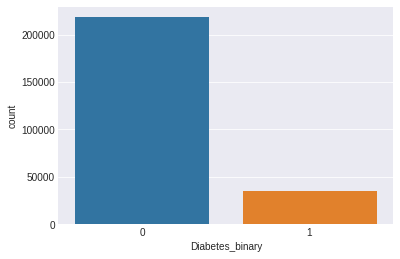

In [ ]:
sns.countplot(x='Diabetes_binary',data=df)

Unbal

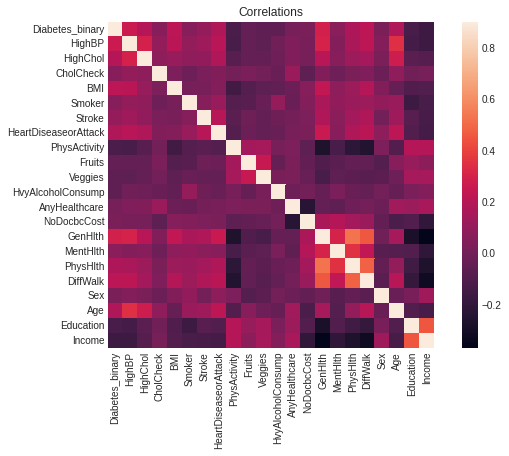

In [ ]:
#heatmap correlation
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True)
plt.title("Correlations")
plt.show()

In [ ]:
correlation = df.corr()
updatedData = pd.DataFrame();
cnt = 0;
for i in range (len(correlation['Diabetes_binary'])):
    if abs(correlation['Diabetes_binary'][i]) >= 0.05:
        myColumn = df[df.columns[i] ]
        updatedData.insert(cnt,df.columns[i],myColumn)
        cnt = cnt+1

In [ ]:
# # Class count
# count_class_0, count_class_1 = updatedData['Diabetes_binary'].value_counts()

# # Divide by class
# df_class_0 = updatedData[updatedData['Diabetes_binary'] == 0]
# df_class_1 = updatedData[updatedData['Diabetes_binary'] == 1]


In [ ]:

# # Undersample 0-class and concat the DataFrames of both class
# df_class_0_under = df_class_0.sample(count_class_1)
# updatedData = pd.concat([df_class_0_under, df_class_1], axis=0)

# print('Random under-sampling:')
# print(updatedData['Diabetes_binary'].value_counts())



# # Oversample 1-class and concat the DataFrames of both classes
# df_class_1_over = df_class_1.sample(count_class_0, replace=True)
# df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# print('Random over-sampling:')
# print(updatedData['Diabetes_binary'].value_counts())

In [ ]:
X = updatedData.drop(['Diabetes_binary'],axis=1)
y = updatedData['Diabetes_binary']

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

0    218334
1    218334
Name: Diabetes_binary, dtype: int64

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(349334, 17)
(349334,)
(87334, 17)
(87334,)


In [ ]:
# Creating StandardScaler instance
sc = StandardScaler()
# Fitting Standard Scaller
X_train = sc.fit_transform(X_train)
# Scaling data
X_test = sc.transform(X_test)

In [ ]:
def main(classifier):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)

  #Training Data Set
  print("\n-----------TRAINING DATA-----------")
  AccScore = accuracy_score(y_train, y_train_pred)
  F1Score=f1_score(y_train, y_train_pred,average='weighted')
  PrecisionScore = precision_score(y_train, y_train_pred, average='weighted')
  print("Accuracy Score: ",AccScore*100)
  print('Precision Score is : ', PrecisionScore*100)
  print("F1-Score: ",F1Score*100)

  CM = confusion_matrix(y_train, y_train_pred)
  print('Confusion Matrix is : \n', CM)
  # drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()


  print("\n-----------TESTING DATA-----------")
  #Testing Data Set
  AccScore = accuracy_score(y_test, y_test_pred)
  F1Score=f1_score(y_test, y_test_pred,average='weighted')
  PrecisionScore = precision_score(y_test, y_test_pred, average='weighted')
  print("Accuracy Score: ",AccScore*100)
  print('Precision Score is : ', PrecisionScore*100)
  print("F1-Score: ",F1Score*100)

  CM = confusion_matrix(y_test, y_test_pred)
  print('Confusion Matrix is : \n', CM)
  # drawing confusion matrix
  plt.figure(figsize = (8,6))
  sns.heatmap(CM, center = True, fmt = ".0f", cmap = 'viridis')
  plt.show()



-----------TRAINING DATA-----------
Accuracy Score:  73.46293232264824
Precision Score is :  73.48568761873989
F1-Score:  73.45610621701603
Confusion Matrix is : 
 [[125461  49100]
 [ 43603 131170]]


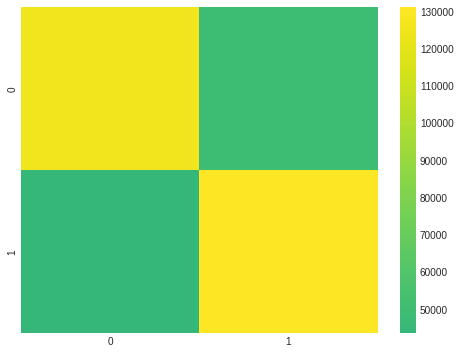


-----------TESTING DATA-----------
Accuracy Score:  73.74333020358623
Precision Score is :  73.77837377528384
F1-Score:  73.73548640161037
Confusion Matrix is : 
 [[31498 12275]
 [10656 32905]]


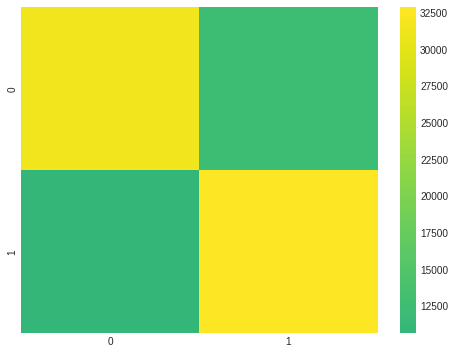

In [ ]:
#Fitting Logistic Regression Model
classifier = LogisticRegression(C= 100, random_state= 0)
classifier.fit(X_train, y_train)
main(classifier)


-----------TRAINING DATA-----------
Accuracy Score:  97.56651227764831
Precision Score is :  97.56683121076686
F1-Score:  97.56650622582474
Confusion Matrix is : 
 [[170083   4478]
 [  4023 170750]]


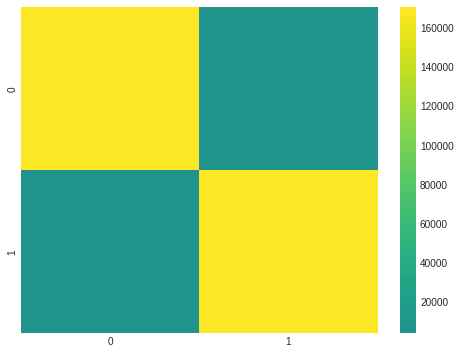


-----------TESTING DATA-----------
Accuracy Score:  82.45356905672476
Precision Score is :  82.72233342864051
F1-Score:  82.41989372755617
Confusion Matrix is : 
 [[34146  9627]
 [ 5697 37864]]


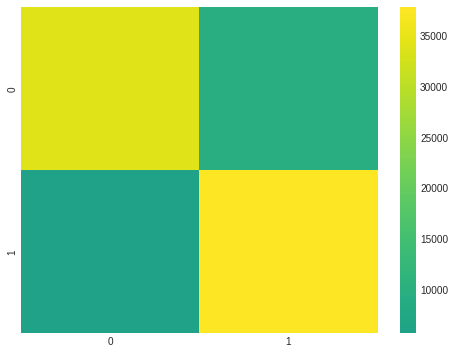


-----------------------------------------------



,Feature,Importance (%)
0,BMI,16.86
1,GenHlth,13.05
2,Age,12.95
3,Income,10.50
4,PhysHlth,9.24
5,Education,7.31
6,MentHlth,7.29
7,HighBP,4.81
8,HighChol,3.44
9,Smoker,2.89


In [ ]:
classifier = DecisionTreeClassifier(criterion= 'entropy')
classifier = classifier.fit(X_train,y_train)
main(classifier)
print('\n-----------------------------------------------\n')

fun=lambda row: np.round((row * 100),2)
features = fun(classifier.feature_importances_)
def Sort_Tuple(tup):
    return(sorted(tup, key = lambda x: x[1],reverse=True)) 
pd.DataFrame(Sort_Tuple(list(zip(X.columns,features))),columns=['Feature', 'Importance (%)'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,



-----------TRAINING DATA-----------
Accuracy Score:  73.57171074101004
Precision Score is :  73.77145004625878
F1-Score:  73.51492992579298
Confusion Matrix is : 
 [[120365  54196]
 [ 38127 136646]]


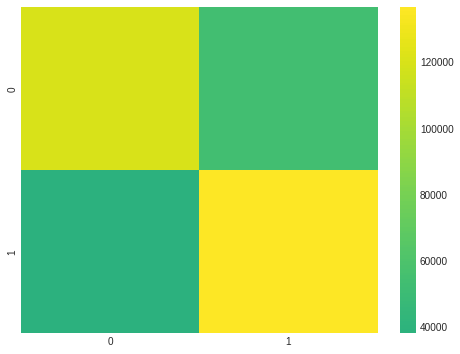


-----------TESTING DATA-----------
Accuracy Score:  73.84981794032106
Precision Score is :  74.08271082793114
F1-Score:  73.7911951291612
Confusion Matrix is : 
 [[30235 13538]
 [ 9300 34261]]


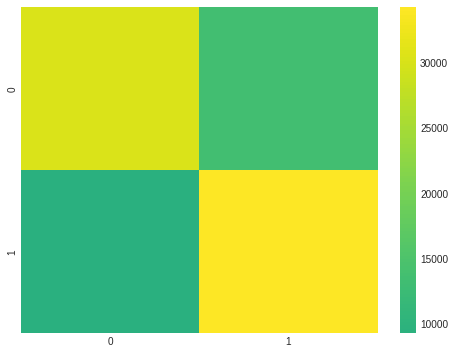

In [ ]:
from sklearn.svm import LinearSVC
classifier =LinearSVC( C=100,loss="hinge")
classifier.fit(X_train, y_train)
main(classifier)